In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
def Elementos(df):
    for column in df.columns:
        lista=df[column].unique()
        print(column + ' tiene ' + str(len(lista)) +' elementos')
        if len(lista)<2 or len(lista)>1000:
            continue
        counts=pd.DataFrame()
        for elemento in lista:
            counts.loc[elemento,'Cantidad']=sum(df[column]==elemento)
        counts.plot.bar()
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Element Counts in {column}')
        plt.show()

In [3]:
def create_dummy_variables(data):
    categorical_columns = data.select_dtypes(include='object').columns.tolist()
    new_data = data.copy()
    for column in categorical_columns:
        dummies = pd.get_dummies(new_data[column], prefix=column, drop_first=True)
        new_data = pd.concat([new_data, dummies], axis=1)
    new_data = new_data.drop(categorical_columns, axis=1)
    return new_data

# Leo la base de datos

In [4]:
BD=pd.read_csv('dataset_SCL.csv')

/tmp/ipykernel_44118/433755694.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  BD=pd.read_csv('dataset_SCL.csv')


## Existe un warning, se debe a que hay números y letras en las columnas 1 y 6, correspondiente a números de vuelos, lo que es consistente. por lo que fijare estos elementos como strings.

In [5]:
BD=pd.read_csv('dataset_SCL.csv',dtype={'Vlo-I': str, 'Vlo-O': str})
BD

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


# Pregunta 1: 
## ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?


Para ver como se distribuyen los datos, genero gráficos las distintas cantidades de distintos elementos.
Mediante la funcion Elementos definida arriba. 

Es posible concluir lo siguiente:
-En la base hay elementos que solo tienen un valor, por lo que no nos sirven para realizar predicciones. 
-Los datos asociados a las fechas con detalle son muchos, pero se agrupan sensatamente en categorías, de día, mes y año.
-Se pueden observar algunas tendencias, como las aerolíneas más utilizadas o los destinos más comunes. 


Fecha-I tiene 53252 elementos
Vlo-I tiene 584 elementos


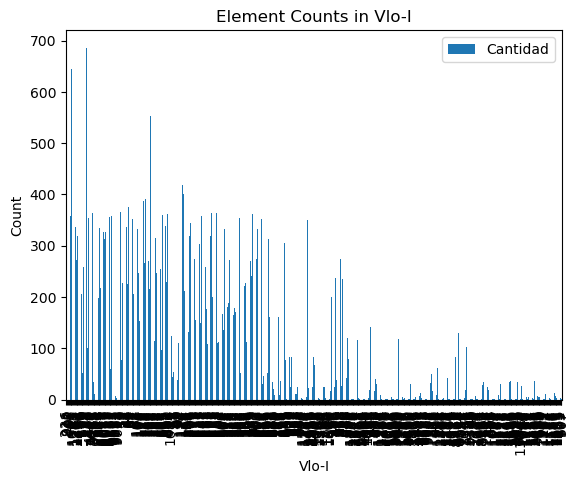

Ori-I tiene 1 elementos
Des-I tiene 64 elementos


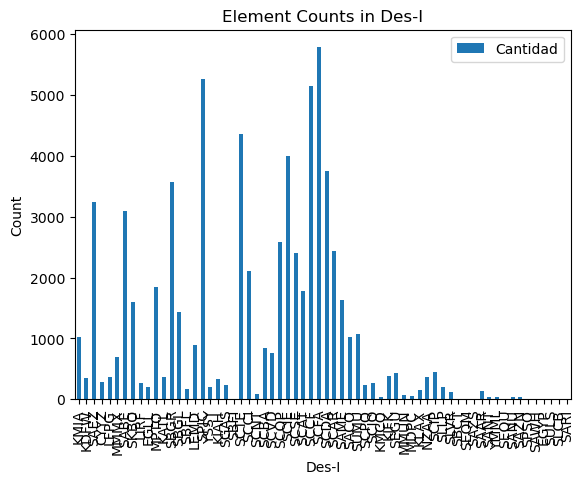

Emp-I tiene 30 elementos


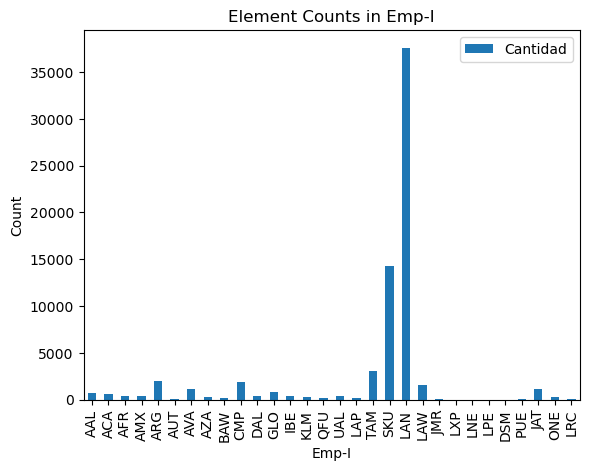

Fecha-O tiene 62774 elementos
Vlo-O tiene 862 elementos


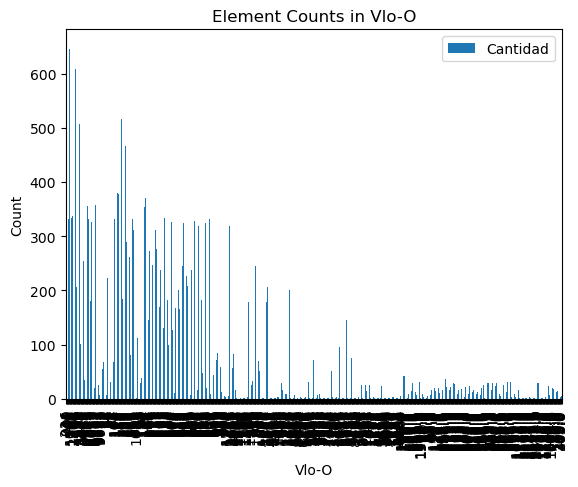

Ori-O tiene 1 elementos
Des-O tiene 63 elementos


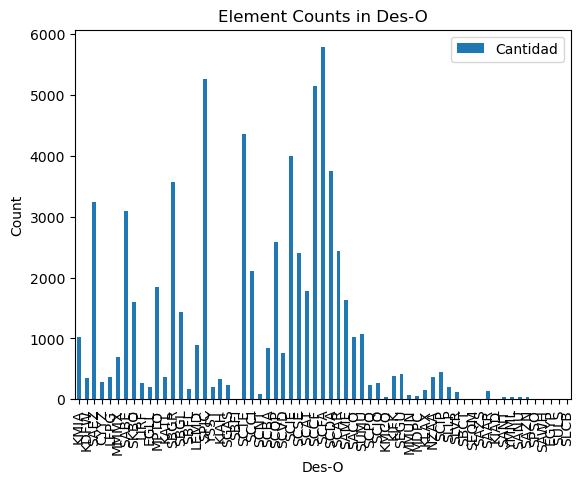

Emp-O tiene 32 elementos


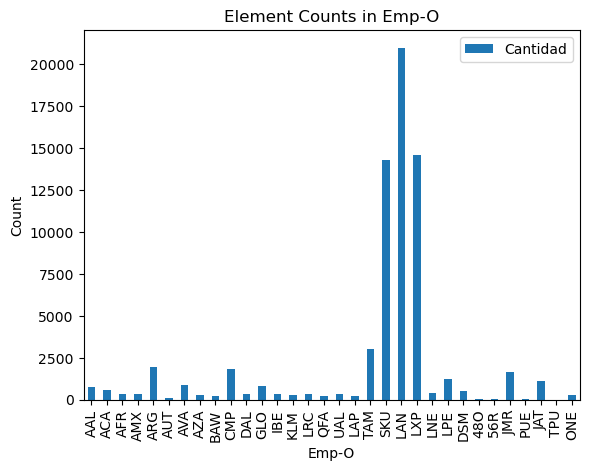

DIA tiene 31 elementos


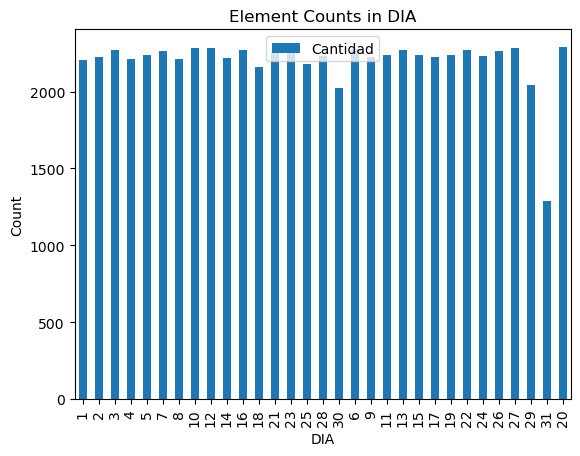

MES tiene 12 elementos


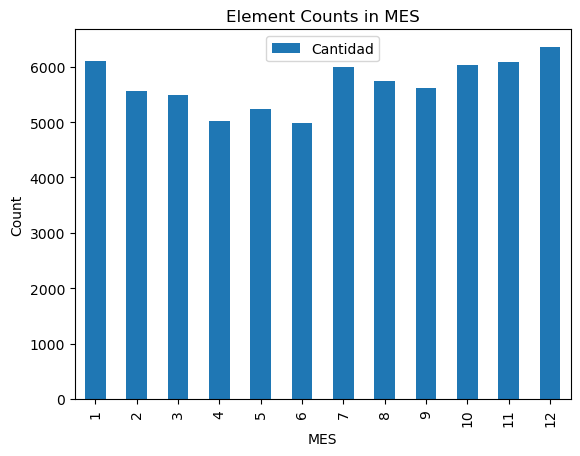

AÑO tiene 2 elementos


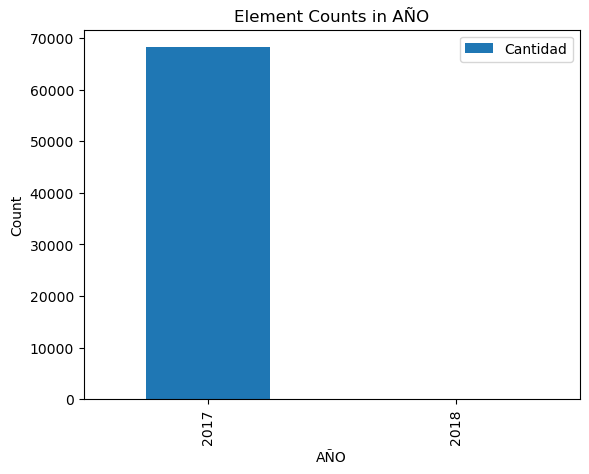

DIANOM tiene 7 elementos


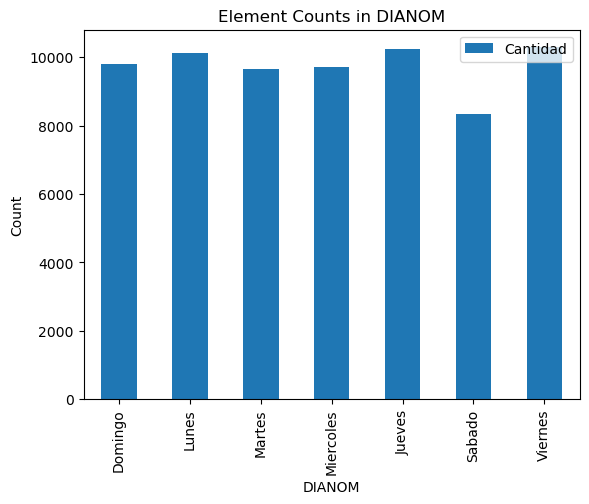

TIPOVUELO tiene 2 elementos


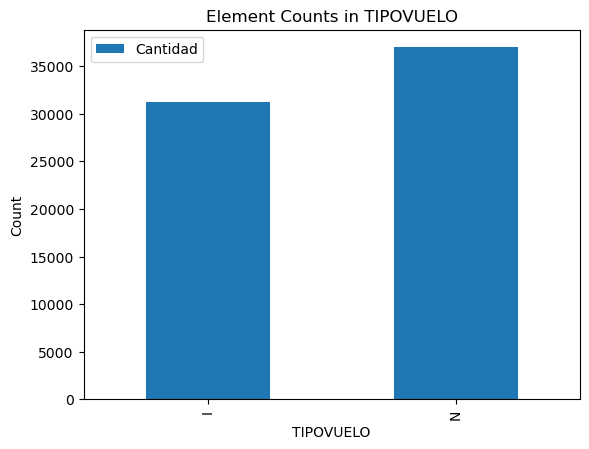

OPERA tiene 23 elementos


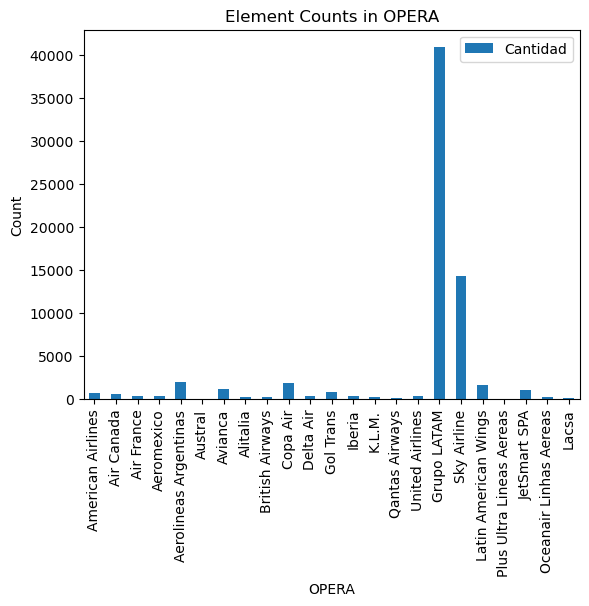

SIGLAORI tiene 1 elementos
SIGLADES tiene 62 elementos


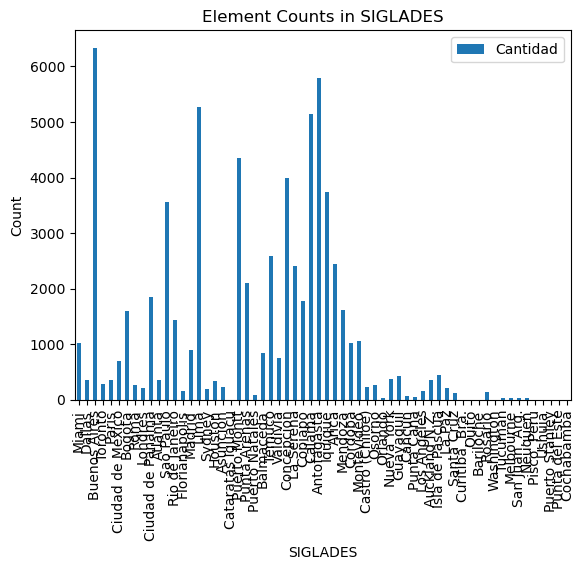

In [6]:
Elementos(BD)

# Pregunta 2:
## Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv:
a. Temporada alta: la temporada alta se considera si Fecha-I está entre 15 Diciembre y 3 Marzo, o 15 Julio y 31 Julio, o 11 Septiembre y 30 Septiembre.  
b. Diferencia en minutos : diferencia en minutos entre Fecha-O y Fecha-I .  
c. Atraso menor: atrasos menores son aquellos donde el tiempo total de atraso es más de 0 minutos y menos de 15 minutos.  
d. Periodo día: donde los periodos del día se consideran como mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I.






# a.-

In [7]:
BD['Temporada_alta']=False

In [8]:
BD['Fecha-I']=pd.to_datetime(BD['Fecha-I'])

In [9]:
start_date = datetime.datetime(2017, 12, 15)
end_date = datetime.datetime(2018, 3, 16)
BD.loc[(BD['Fecha-I'] >= start_date) & (BD['Fecha-I'] < end_date),'Temporada_alta'] = True 
start_date = datetime.datetime(2017, 7, 15)
end_date = datetime.datetime(2017, 8, 1)
BD.loc[(BD['Fecha-I'] >= start_date) & (BD['Fecha-I'] < end_date),'Temporada_alta'] = True 
start_date = datetime.datetime(2017, 9, 11)
end_date = datetime.datetime(2018, 10, 1)
BD.loc[(BD['Fecha-I'] >= start_date) & (BD['Fecha-I'] < end_date),'Temporada_alta'] = True 

# b.- 

In [10]:
BD['Fecha-I']=pd.to_datetime(BD['Fecha-I'])
BD['Fecha-O']=pd.to_datetime(BD['Fecha-O'])

In [11]:
BD['Diferencia_en_minutos'] = (BD['Fecha-O'] - BD['Fecha-I']).dt.total_seconds() / 60

# c.-

In [12]:
BD['Atraso_menor']=(BD['Diferencia_en_minutos']>0)&(BD['Diferencia_en_minutos']<15)

# d.-

In [13]:
BD['Periodo_día'] = pd.NA
BD.loc[(BD['Fecha-I'].dt.hour >= 5) & (BD['Fecha-I'].dt.hour < 12), 'Periodo_día'] = 'Mañana'
BD.loc[(BD['Fecha-I'].dt.hour >= 12) & (BD['Fecha-I'].dt.hour < 19), 'Periodo_día'] = 'Tarde'
BD.loc[(BD['Fecha-I'].dt.hour >= 19) | (BD['Fecha-I'].dt.hour < 5), 'Periodo_día'] = 'Noche'

# Exporto a synthetic_features.csv:

In [14]:
BD[['Temporada_alta','Diferencia_en_minutos','Atraso_menor','Periodo_día']].to_csv('synthetic_features.csv')

# Pregunta 3:
## Entrena uno o varios modelos usando los algoritmos que prefieras para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

En primera instancia defino una columna que indica existencia o no de atraso:

In [15]:
BD['Atraso']=BD['Diferencia_en_minutos']>0

A continuación eliminare columnas que no presentan utilidad, es decir las contienen menos de 2 valores únicos y las que contienen fechas con alta precisión, dado que su información se encuentra capturada en otras variables. 
Para no perder la información, generare nueva base de datos. 

In [16]:
BD2=BD.copy()

In [17]:
BD2=BD2.drop(columns=['Fecha-I','Ori-I','Fecha-O','Ori-O','SIGLAORI'])

También elimino variables Diferencia_en_minutos, Atraso_menor y los valores "-O" restantes, debido a que asumiré que desconozco la información especifica de operación del vuelo para la predicción, por lo que es información no útil. 

In [18]:
BD2=BD2.drop(columns=['Diferencia_en_minutos','Atraso_menor','Vlo-O','Des-O','Emp-O'])

Vuelvo a mirar la distribución de los datos:

Vlo-I tiene 584 elementos


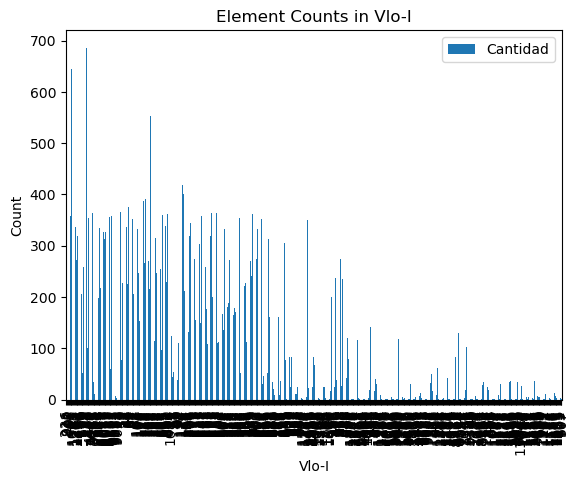

Des-I tiene 64 elementos


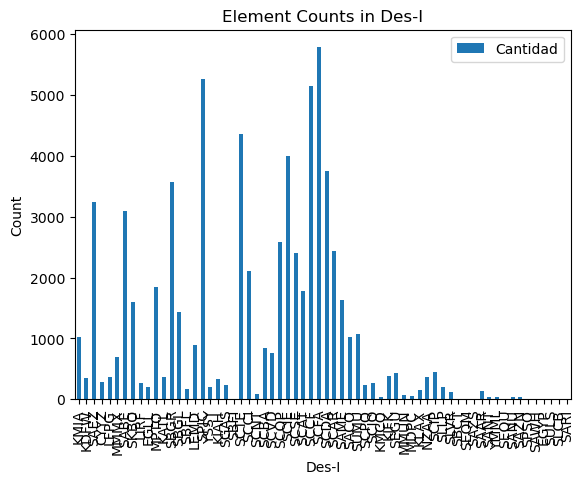

Emp-I tiene 30 elementos


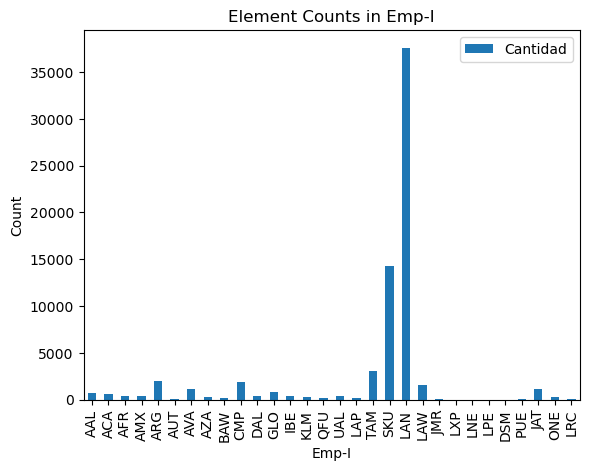

DIA tiene 31 elementos


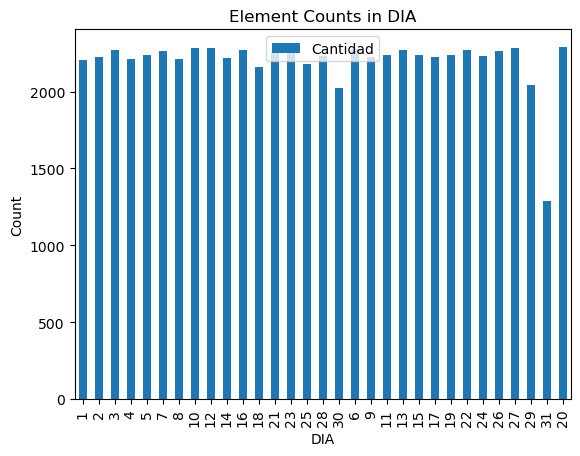

MES tiene 12 elementos


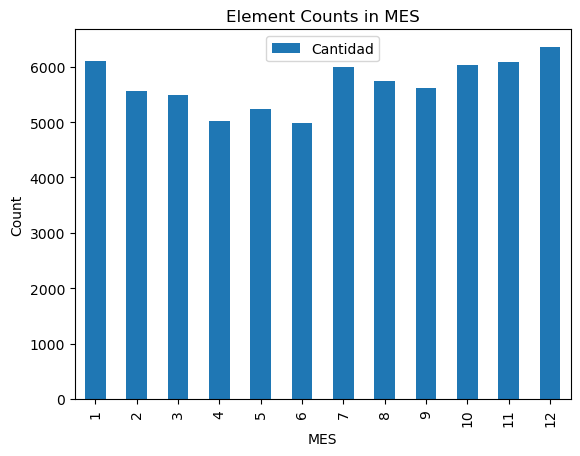

AÑO tiene 2 elementos


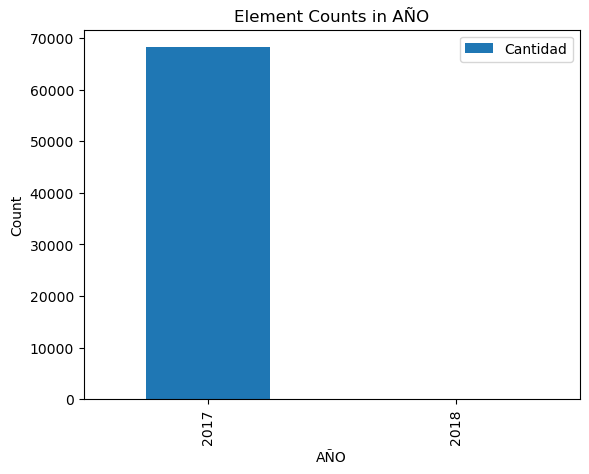

DIANOM tiene 7 elementos


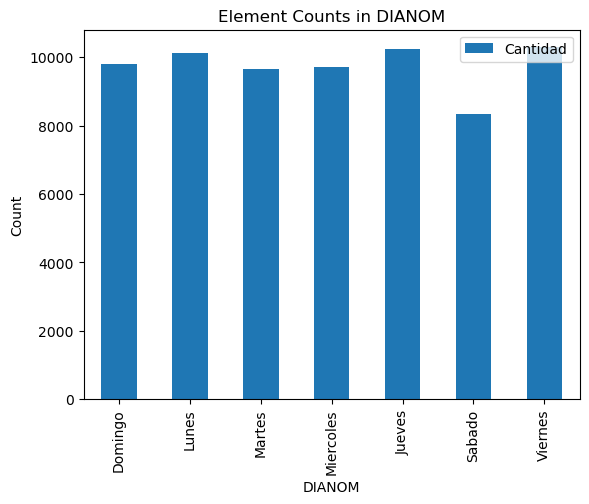

TIPOVUELO tiene 2 elementos


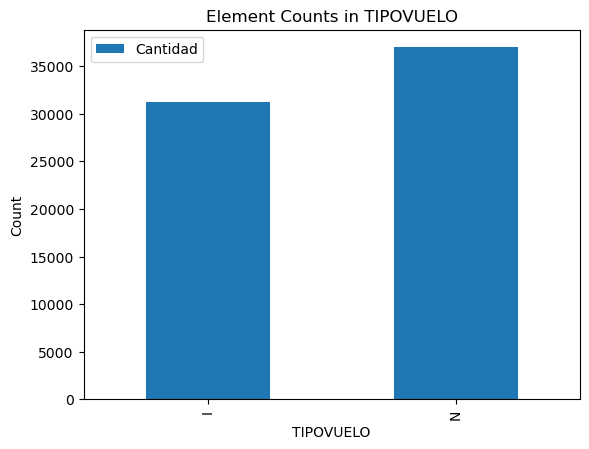

OPERA tiene 23 elementos


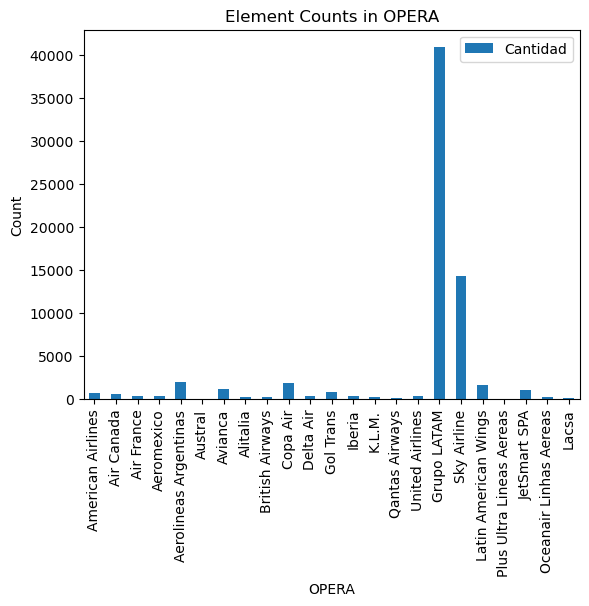

SIGLADES tiene 62 elementos


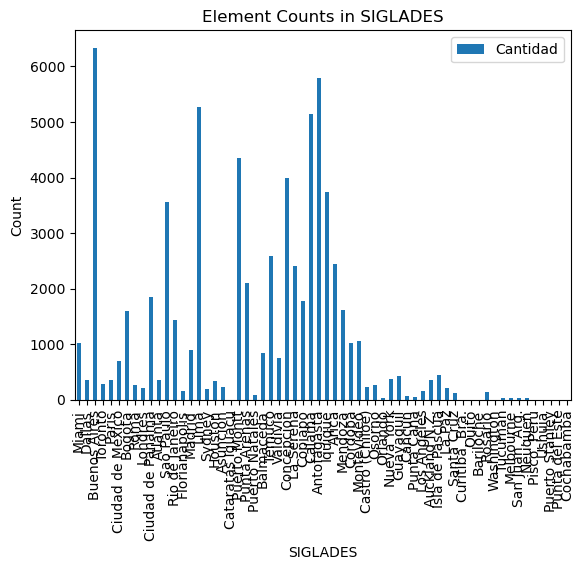

Temporada_alta tiene 2 elementos


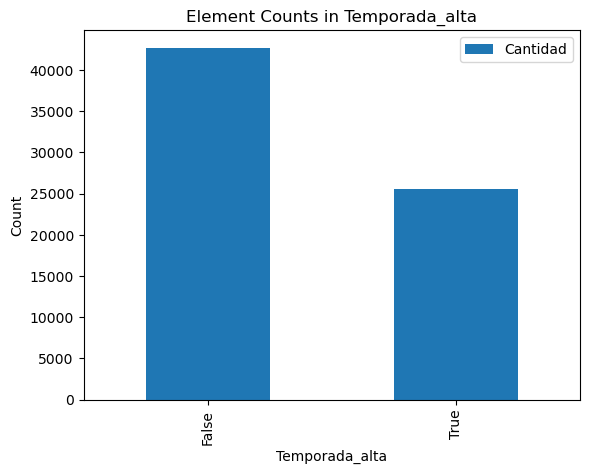

Periodo_día tiene 3 elementos


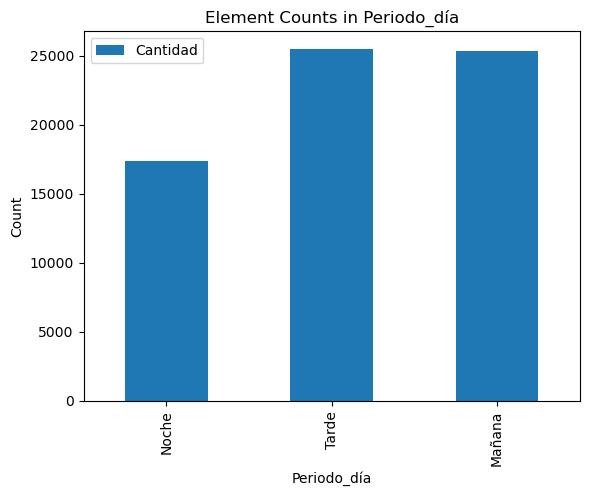

Atraso tiene 2 elementos


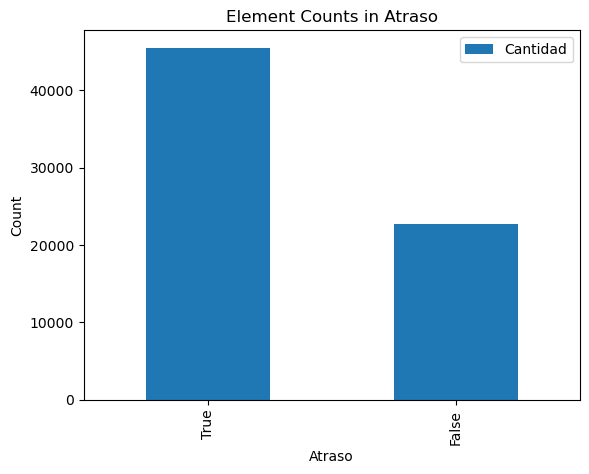

In [19]:
Elementos(BD2)

A continuación genero variables dummies para las variables categóricas correspondientes, utilizo la función definida arriba:

In [20]:
BD2=create_dummy_variables(BD2)

In [22]:
BD2

,DIA,MES,AÑO,Temporada_alta,Atraso,Vlo-I_10,Vlo-I_100,Vlo-I_1003,Vlo-I_1004,Vlo-I_1005,...,SIGLADES_Sao Paulo,SIGLADES_Sydney,SIGLADES_Temuco,SIGLADES_Toronto,SIGLADES_Tucuman,SIGLADES_Ushuia,SIGLADES_Valdivia,SIGLADES_Washington,Periodo_día_Noche,Periodo_día_Tarde
0,1,1,2017,False,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,2017,False,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,1,2017,False,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1,2017,False,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,1,2017,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,22,12,2017,True,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
68202,25,12,2017,True,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
68203,27,12,2017,True,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
68204,29,12,2017,True,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
